# Makine Öğrenmesi ile Müşteri Kaybı (CHURN) Olasılık Tahminlemesi, Bankacılık Sektöründen Örnek Veri Seti ve Python Uygulaması

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(columns=["RowNumber","CustomerId","Surname"])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
pd.DataFrame(data.isnull().sum(),columns=["Count"])


,Count
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


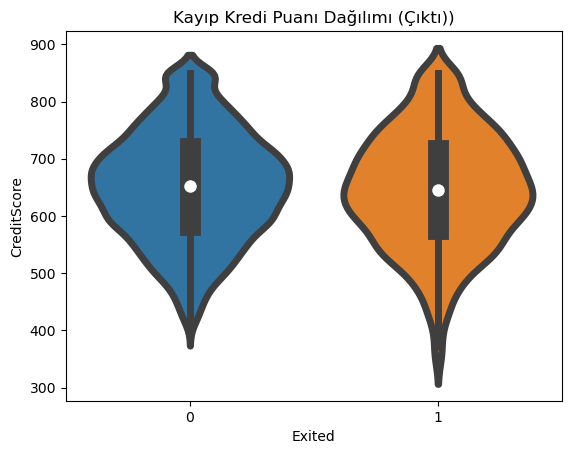

In [7]:
sns.violinplot( x=data["Exited"], y=data["CreditScore"], linewidth=5)
plt.title("Kayıp Kredi Puanı Dağılımı (Çıktı))")
plt.show()

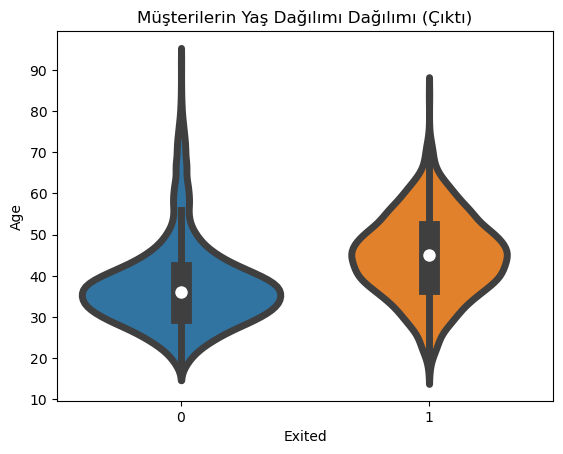

In [8]:
sns.violinplot( x=data["Exited"], y=data["Age"], linewidth=5)
plt.title("Müşterilerin Yaş Dağılımı Dağılımı (Çıktı)")
plt.show()

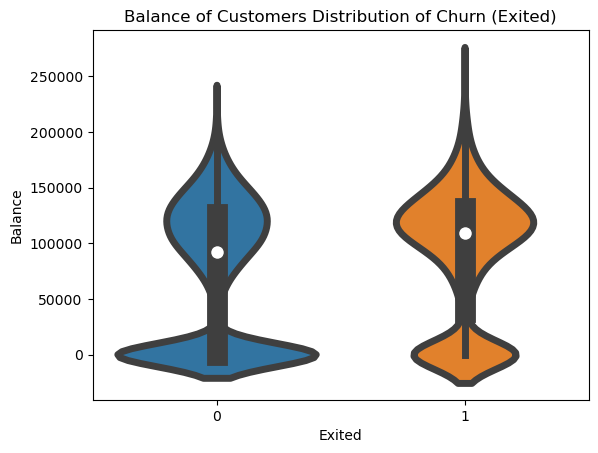

In [10]:
# Exited (Churn) -- Balance (Hesap Tutar)
sns.violinplot( x=data["Exited"], y=data["Balance"], linewidth=5)
plt.title("Balance of Customers Distribution of Churn (Exited)")
plt.show()

<Axes: >

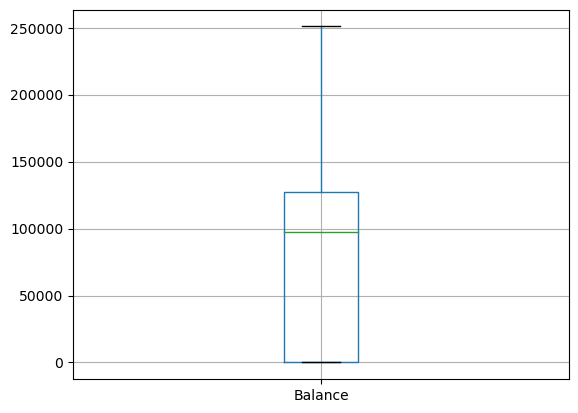

In [12]:
# Balance boxplot
data[["Balance"]].boxplot()

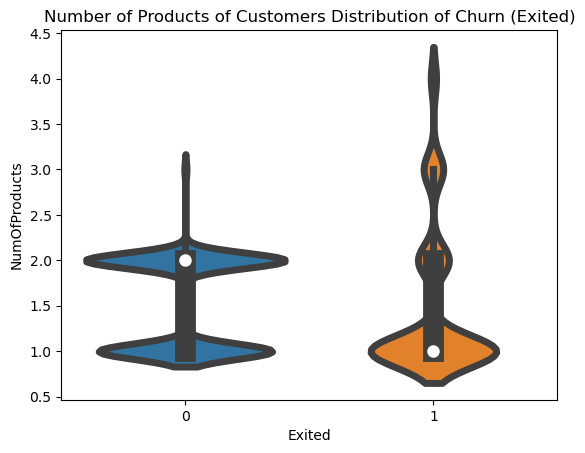

In [13]:
# Exited (Churn) -- NumOfProducts (Ürün Sayısı)
sns.violinplot( x=data["Exited"], y=data["NumOfProducts"], linewidth=5)
plt.title("Number of Products of Customers Distribution of Churn (Exited)")
plt.show()

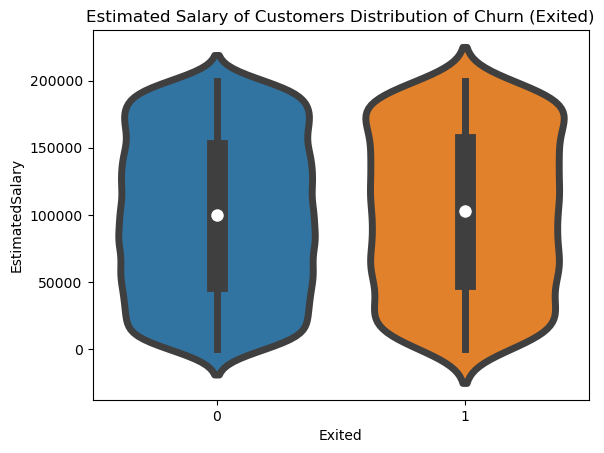

In [15]:
# Exited (Churn) -- EstimatedSalary (Maaş)
sns.violinplot( x=data["Exited"], y=data["EstimatedSalary"], linewidth=5)
plt.title("Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()

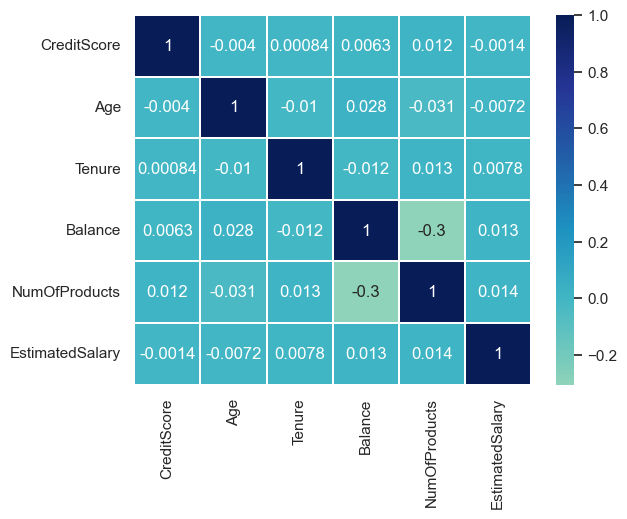

In [16]:
# Korelasyon Matrisi
korelasyon = data[["CreditScore","Age","Tenure","Balance",
                   "NumOfProducts","EstimatedSalary"]]
sns.set()
corr = korelasyon.corr()
ax = sns.heatmap(corr
                 ,center=0
                 ,annot=True
                 ,linewidths=.2
                 ,cmap="YlGnBu")
plt.show()

In [17]:
predictors = data.iloc[:,0:10]
target = data.iloc[:,10:]

In [18]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [19]:
predictors

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [20]:
# erkek = 1, kadın = 0
predictors['isMale'] = predictors['Gender'].map({'Male':1, 'Female':0})

predictors[['France', 'Germany', 'Spain']] = pd.get_dummies(predictors['Geography'])

predictors = predictors.drop(columns=['Gender','Geography','Spain'])

In [21]:
predictors

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,France,Germany
0,619,42,2,0.00,1,1,1,101348.88,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [22]:
# Normalizasyon formülü
normalization = lambda x:(x-x.min()) / (x.max()-x.min())
# Uygulama
transformColumns = predictors[["Balance","EstimatedSalary","CreditScore"]]
predictors[["Balance","EstimatedSalary","CreditScore"]] = normalization(transformColumns)

In [23]:
# Train and test split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.25, random_state=0)

pd.DataFrame({"Train Satır Sayısı":[x_train.shape[0],y_train.shape[0]],
              "Test Satır Sayısı":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Satır Sayısı,Test Satır Sayısı
X (Predictors),7500,2500
Y (Target),7500,2500


In [24]:
"""Modelleme Kütüphaneleri"""
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

"""Model Eleme"""
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [25]:
# Karar Ağacı - Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)
# Lojistik Regresyon - Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred_logr)
# Naif Bayes - Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)
# K En Yakın Komşu - K Neighbors Classifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)
# Rassal Ağaçlar - Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)
# Sinir Ağları - Neural Network
nnc = MLPClassifier()
nnc.fit(x_train,y_train)
y_pred_nnc = nnc.predict(x_test)
nnc_acc = accuracy_score(y_test,y_pred_nnc)
# Xgboost Classifier
xgboast = xgb.XGBClassifier()
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)
# Sonuçların bir tabloya yazdırılması
pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Ferest","Neural Network","Xgboost Classifier"],
              "Scores":[dtc_acc, logr_acc, gnb_acc, knn_acc, rfc_acc,nnc_acc,xgboast]})

/Users/muhammeteminozdemir/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muhammeteminozdemir/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/muhammeteminozdemir/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was ex

,Algorithms,Scores
0,Decision Tree,0.8040
1,Logistic Regression,0.8072
2,Naive Bayes,0.8096
3,K Neighbors Classifier,0.8272
4,Random Ferest,0.8704
5,Neural Network,0.8548
6,Xgboost Classifier,0.8552
